In [9]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
drive.mount('/content/drive')

import IPython.display as ipd
from tqdm import tqdm #show a smart progress meter
import librosa # for loading the audio file to TS

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [11]:
import tensorflow as tf
import keras
#from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from sklearn import model_selection

**Data Cleaning Function:**

In [ ]:
final_list=[]

In [ ]:
# Define paths
harrypotter_dir = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/HarryPotter'
csv_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/MLEndHWD_Audio_Attributes.csv'

# Load the CSV file
audio_data = pd.read_csv(csv_path)

In [ ]:
def get_clean_dataframe(files, song_list, title):
    """
    Create a clean DataFrame by matching file names in the list with corresponding CSV data.
    """
    table = []

    for file in files:
        # Extract file name from the path
        file_name = os.path.basename(file)

        # Match with the CSV data and build the table
        matched_row = audio_data[audio_data['Public filename'] == file_name]

        if not matched_row.empty:
            participant_ID = matched_row.iloc[0]['Interpreter']
            interpretation_type = matched_row.iloc[0]['Interpretation']
            song = matched_row.iloc[0]['Song']

            # Append the matched information to the table
            table.append([file_name, participant_ID, interpretation_type, song])

    # Create a DataFrame from the table
    df = pd.DataFrame(table, columns=['file_id', 'participant', 'interpretation', 'song'])
    return df


**Data Processing of 7 songs**

In [ ]:
# Get all files in the HarryPotter folder
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/HarryPotter/*.wav'
files_harry = glob.glob(sample_path)
final_list.extend(files_harry)

# Define the correct title of the song
title = 'Harry'

# Define all the possible titles to be found in the file names
song_list = ['Potter', 'potter', 'Harry', 'harry']

Harry_df = get_clean_dataframe(files_harry, song_list, title)

In [ ]:
print(len(files_harry), Harry_df.shape, len(final_list))

411 (411, 4) 411


In [ ]:
Harry_df.head(5)

,file_id,participant,interpretation,song
0,0000.wav,216,Hum,Potter
1,0002.wav,177,Hum,Potter
2,0001.wav,100,Hum,Potter
3,0003.wav,159,Hum,Potter
4,0017.wav,70,Whistle,Potter


In [ ]:
# Get all files in the StarWars folder
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/StarWars/*.wav'
files_starwars = glob.glob(sample_path)
final_list.extend(files_starwars)

# Define the correct title of the song
title = 'StarWars'

# Define all the possible titles to be found in the file names
song_list = ['StarWars', 'StarWar', 'Star Wars', 'Star war', 'Starwars', 'Imperial', 'starwars', 'StarsWars',
              'star_wars', 'starwar', 'imperial_march', 'STARWAR', 'StartWars', 'StatWars', 'Star wars', 'star wars']

StarWars_df = get_clean_dataframe(files_starwars, song_list, title)

In [ ]:
print(len(files_starwars), StarWars_df.shape, len(final_list))

413 (413, 4) 824


In [ ]:
StarWars_df.head(5)

,file_id,participant,interpretation,song
0,0904.wav,98,Whistle,StarWars
1,0907.wav,196,Whistle,StarWars
2,0902.wav,156,Hum,StarWars
3,0900.wav,63,Hum,StarWars
4,0903.wav,15,Hum,StarWars


In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/Frozen/*.wav'
files_frozen = glob.glob(sample_path)
final_list.extend(files_frozen)

title='Frozen'
song_list= ['Frozen', 'frozen', 'letitgo']

Frozen_df= get_clean_dataframe(files_frozen, song_list, title)


In [ ]:
print(len(files_frozen), Frozen_df.shape, len(final_list))

410 (410, 4) 1234


In [ ]:
Frozen_df.head(5)

,file_id,participant,interpretation,song
0,5800.wav,146,Whistle,Frozen
1,5801.wav,124,Hum,Frozen
2,5802.wav,0,Whistle,Frozen
3,5803.wav,84,Whistle,Frozen
4,5804.wav,226,Hum,Frozen


In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/Panther/*.wav'
files_panther = glob.glob(sample_path)
final_list.extend(files_panther)

title='Panther'
song_list= ['Panther', 'panther', 'pink panther', 'Panter']

Panther_df= get_clean_dataframe(files_panther, song_list, title)



In [ ]:
print(len(files_panther), Panther_df.shape, len(final_list))

413 (413, 4) 1647


In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/Hakuna/*.wav'
files_hakuna = glob.glob(sample_path)
final_list.extend(files_hakuna)

title='Hakuna'
song_list= ['Hakuna', 'hakuna', 'hakunamatata', 'HaKuna', 'Hakana', 'Hukuna', 'Haknua']

Hakuna_df= get_clean_dataframe(files_hakuna, song_list, title)



In [ ]:
print(len(files_hakuna), Hakuna_df.shape, len(final_list))

412 (412, 4) 2059


In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/Mamma/*.wav'
files_mamma = glob.glob(sample_path)
final_list.extend(files_mamma)

title='Mamma'
song_list= ['Mamma', 'mamma', 'mummamia', 'Mumma', 'mamamia', 'mamia', 'Mama']

Mamma_df= get_clean_dataframe(files_mamma, song_list, title)


In [ ]:
print(len(files_mamma), Mamma_df.shape, len(final_list))

411 (411, 4) 2470


In [ ]:
sample_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/Rain/*.wav'
files_rain = glob.glob(sample_path)
final_list.extend(files_rain)

title='Rain'
song_list= ['Rain', 'rain']

Rain_df= get_clean_dataframe(files_rain, song_list, title)


In [ ]:
print(len(files_rain), Rain_df.shape, len(final_list))

413 (413, 4) 2883


**Final Dataset: Merging all the songs**

In [ ]:
final_df= pd.concat([Harry_df, StarWars_df, Frozen_df, Hakuna_df, Mamma_df, Rain_df, Panther_df], sort=False)
final_df.set_index('file_id', inplace=True)


In [ ]:
final_df

,participant,interpretation,song
file_id,,,
0000.wav,216,Hum,Potter
0002.wav,177,Hum,Potter
0001.wav,100,Hum,Potter
0003.wav,159,Hum,Potter
0017.wav,70,Whistle,Potter
...,...,...,...
2501.wav,25,Hum,Panther
2503.wav,146,Hum,Panther
2502.wav,164,Hum,Panther


In [ ]:
len(final_list)


2883

**4.Transformation stage**

**Feature Extraction:**

#### Previously we used following features from the audio data:

*   Power
*   Pitch mean
*   Pitch std
*   Voice frame
*   Interpretation label
*   Song label

#### Advance features which we have added are:

*   MFCC
*   Chroma
*   Mel-fre
*   Contrast

#### we performed this in Python using the Librosa package and resulted in 187 features. The features which we obtained were MFCCs, STFT_Chroma, Melspectrogram, and Spectral Contrast.











In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag


In [ ]:
def getfeatures(files,labels_file, scale_audio=False, onlySingleDigit=False):
  # different song lable
  slable= ['Frozen', 'Potter', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
  X,y,z =[],[],[]
  for file in tqdm(files):
    features = []
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]

    # Feature for interpretation type of the file, True for hum, False for whistle
    y1 = labels_file.loc[fileID]['interpretation'].strip().lower()=='hum'

    # Feature for type of the song,
    if(labels_file.loc[fileID]['song']==slable[0]):
      y2 = 0 # label 0 if file is Frozen song
    elif(labels_file.loc[fileID]['song']==slable[1]):
      y2 = 1 # label 1 if file is Potter song
    elif(labels_file.loc[fileID]['song']==slable[2]):
      y2 = 2 # label 2 if file is Panther song
    elif(labels_file.loc[fileID]['song']==slable[3]):
      y2 = 3 # label 3 if file is Starwars song
    elif(labels_file.loc[fileID]['song']==slable[4]):
      y2 = 4 # label 4 if file is Raina song
    elif(labels_file.loc[fileID]['song']==slable[5]):
      y2 = 5 # label 5 if file is Hakuna song
    else:
      y2 = 6 # label 6 if file is Mamma song

    #print('Y2 is :',y2)

    fs = None # if None, fs would be 22050
    audio_data, sample_rate = librosa.load(file,sr=fs)
    x=audio_data
    fs=sample_rate

    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    stft = np.abs(librosa.stft(audio_data))

    mfcc = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T,axis=0)
    features.extend(mfcc) # 40 = 40

    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    features.extend(chroma) # 12 = 52

    mel = np.mean(librosa.feature.melspectrogram(y=audio_data, sr=sample_rate).T,axis=0)
    features.extend(mel) # 128 = 180

    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    features.extend(contrast) # 7 = 187

    # appending four calculated features
    xi = [power,pitch_mean,pitch_std,voiced_fr]
    features.extend(xi)
    # appending all the features
    X.append(features)
    y.append(y1) # interpretation label
    z.append(y2) # song label

  return np.array(X),np.array(y),np.array(z)


In [ ]:
X,y,x = getfeatures(final_list, labels_file=final_df, scale_audio=True, onlySingleDigit=True)


100%|██████████| 2883/2883 [2:53:14<00:00,  3.61s/it]


**Feature Scaling: Data Normalization**

#### Its important to scale our feature before using them in any Machine Learning algorithms as all the features have different scale and will not be treated uniformly by the ML model if not scaled.

Using Standard Scaler library of sklearn preprocessing package. It uses z-score to normalize the data.

Unscaled Data:




In [ ]:
#converting the scaled features into a pandas data frame
allsong_feature= pd.DataFrame(X)
allsong_feature['interpret_lable']= y
allsong_feature['song_lable']= x
#saving the unscaled features into a csv for future reference
allsong_feature.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/allsong_feature.csv')


Scaled Data:

In [ ]:
scaler = StandardScaler() # define standard scaler
scaled = scaler.fit_transform(X) # transform data

#converting the scaled features into a pandas data frame
allsong_feature_combine= pd.DataFrame(scaled)
allsong_feature_combine['interpret_lable']= y
allsong_feature_combine['song_lable']= x

#saving the features into a csv for future reference
allsong_feature_combine.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/allsong_feature_combine.csv')


**Modelling**

**Reading feature file**

In [ ]:
allsongs_df_scaled= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/allsong_feature_combine.csv').drop(columns={'Unnamed: 0'})



In [ ]:
allsongs_df_unscaled= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/allsong_feature.csv').drop(columns={'Unnamed: 0'})



In [ ]:
allsongs_df_scaled.shape

(2883, 193)

**Data Split**

There are total 2884 audio files in total and 193 features. We will be spliting our dataset in 7:2:1 ratio


*  70% files for training
*  20% files for validation
*  10% files for testing







In [ ]:
X=allsongs_df_scaled.iloc[:,0:190].values # all the features
y=allsongs_df_scaled['interpret_lable'] # hum or whistle


Spliting main dataset into 70% (training) and 30% (remaining)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)


Spliting remaining 30% files int0 2:1 ratio for validation and testing

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

In [ ]:
#checking the data split
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (2018, 190) (2018,)
Size of validation set: (778, 190) (778,)
Size of testing set: (87, 190) (87,)


**Classify if the audio is Hum or Whistle???**

In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)


Training Accuracy 0.9985133795837463
Validation  Accuracy 0.9922879177377892
The support vectors are (253, 190)


**Model 1: SVM (For all the 7 Songs):**

In [ ]:
X=allsongs_df_scaled.iloc[:,0:190].values # all the features
y=allsongs_df_scaled['song_lable'].values

In [ ]:
allsongs_df_scaled['song_lable'].unique()

array([1, 3, 0, 2, 5, 6, 4])

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.1)

#checking the data split
print('Size of training set:', X_train.shape, y_train.shape)
print('Size of validation set:', X_val.shape, y_val.shape)
print('Size of testing set:', X_test.shape, y_test.shape)

Size of training set: (2018, 190) (2018,)
Size of validation set: (778, 190) (778,)
Size of testing set: (87, 190) (87,)


In [ ]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)


Training Accuracy 0.5569871159563925
Validation  Accuracy 0.38946015424164526
The support vectors are (1943, 190)


Applying Grid Search for SVM:

In [ ]:
param_grid = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
    }


In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.01)


In [ ]:
grid_predictions = grid.predict(X_val)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val,grid_predictions))
print(classification_report(y_val,grid_predictions))


[[75 11  4  5  5  5  1]
 [ 9 51 17 11 12  7  1]
 [10 25 36 11  8  3 10]
 [24 13 10 32 13 10  9]
 [16 17  9 13 56  4  2]
 [15  4 19  6  2 56 20]
 [16  4 11 11  1 13 55]]
              precision    recall  f1-score   support

           0       0.45      0.71      0.55       106
           1       0.41      0.47      0.44       108
           2       0.34      0.35      0.34       103
           3       0.36      0.29      0.32       111
           4       0.58      0.48      0.52       117
           5       0.57      0.46      0.51       122
           6       0.56      0.50      0.53       111

    accuracy                           0.46       778
   macro avg       0.47      0.46      0.46       778
weighted avg       0.47      0.46      0.46       778



In [ ]:
best_model = grid.best_estimator_  # Get the best model
val_accuracy = best_model.score(X_val, y_val)  # Compute accuracy on validation set
print("Validation Accuracy from Grid Search:", val_accuracy)


Validation Accuracy from Grid Search: 0.4640102827763496


**Model 2: Using Neural Network**

In [ ]:
### Training / Fitting / Optimizing Model #####
test_size = 0.3
epochs    = 30
batch_size= 10
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)



In [ ]:
classes= ['Frozen', 'Potter', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
n_classes=len(classes)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu',  input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax')) # sigmoid

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history= None
history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
#                         shuffle=True,
                        verbose=2)

Epoch 1/30
202/202 - 3s - 14ms/step - accuracy: 0.2780 - loss: 1.8829 - val_accuracy: 0.3072 - val_loss: 1.7629
Epoch 2/30
202/202 - 1s - 3ms/step - accuracy: 0.4281 - loss: 1.5518 - val_accuracy: 0.3715 - val_loss: 1.7052
Epoch 3/30
202/202 - 1s - 3ms/step - accuracy: 0.4807 - loss: 1.3917 - val_accuracy: 0.4357 - val_loss: 1.6295
Epoch 4/30
202/202 - 1s - 7ms/step - accuracy: 0.5540 - loss: 1.2382 - val_accuracy: 0.4062 - val_loss: 1.6723
Epoch 5/30
202/202 - 1s - 3ms/step - accuracy: 0.5942 - loss: 1.0912 - val_accuracy: 0.4113 - val_loss: 1.7449
Epoch 6/30
202/202 - 1s - 3ms/step - accuracy: 0.6422 - loss: 1.0049 - val_accuracy: 0.4332 - val_loss: 1.6995
Epoch 7/30
202/202 - 1s - 6ms/step - accuracy: 0.6888 - loss: 0.8913 - val_accuracy: 0.4550 - val_loss: 1.7391
Epoch 8/30
202/202 - 1s - 3ms/step - accuracy: 0.7364 - loss: 0.7604 - val_accuracy: 0.4447 - val_loss: 1.7924
Epoch 9/30
202/202 - 1s - 5ms/step - accuracy: 0.7800 - loss: 0.6633 - val_accuracy: 0.4486 - val_loss: 2.3678


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          48,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,511 (1.04 MB)

 Trainable params: 90,503 (353.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 181,008 (707.07 KB)

In [ ]:
score_train = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_train[1])
print("Training Cross Entropy: %.2f" % score_train[0])

score_test = model.evaluate(X_val, y_val, verbose=0)
print("Validation Accuracy: ", score_test[1])
print("Validation Cross Entropy: %.2f" % score_test[0])

Training Accuracy:  0.9068384766578674
Training Cross Entropy: 0.41
Validation Accuracy:  0.4113110601902008
Validation Cross Entropy: 3.74


**6. Methodology**

Analysing the accuracy and confusion matrix for better understanding of the results.

In [ ]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes,
           yticklabels=classes,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_ylim(len(classes)-0.5, -0.5)
    ax.set_aspect('auto')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.show()

**Accuracy of SVM model:**

In [ ]:
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))



Training Accuracy 0.5569871159563925
Validation  Accuracy 0.38946015424164526


**Confusing Matrix : SVM**

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to class labels
y_pred = model.predict(X_val)

y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_labels)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
classes= ['Frozen', 'Potter', 'Panther', 'StarWars', 'Rain','Hakuna', 'Mamma']
n_classes=len(classes)


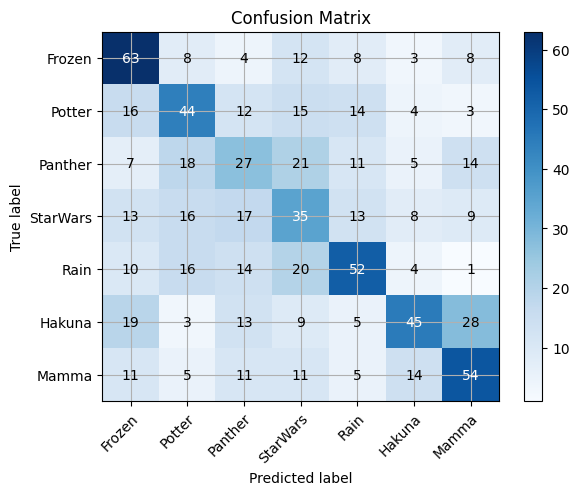

In [ ]:
plot_confusion_matrix(cm)

**Accuracy of CNN Model**

In [ ]:
score_train = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score_train[1])
print("Training Cross Entropy: %.2f" % score_train[0])

score_test = model.evaluate(X_val, y_val, verbose=0)
print("Validation Accuracy: ", score_test[1])
print("Validation Cross Entropy: %.2f" % score_test[0])


Training Accuracy:  0.9068384766578674
Training Cross Entropy: 0.41
Validation Accuracy:  0.4113110601902008
Validation Cross Entropy: 3.74


**Confusion Matrix for CNN Model**

In [ ]:
y_pred_percentages = model.predict(X_val) # predicted percentages
y_pred = np.argmax(y_pred_percentages, axis=1) # Most prevalent prediction
cm = confusion_matrix(y_val, y_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


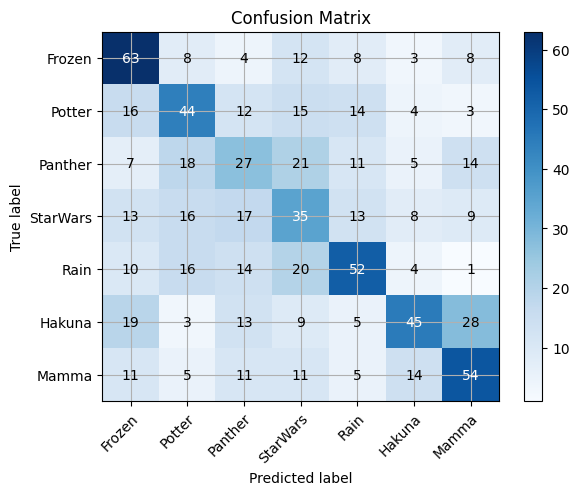

In [ ]:
plot_confusion_matrix(cm)

**7. Dataset**

Visulaizing a wave form:

In [ ]:
import librosa
audio_path = '/content/drive/MyDrive/Colab Notebooks/ML/MajorProject/Full Data/Frozen/5800.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

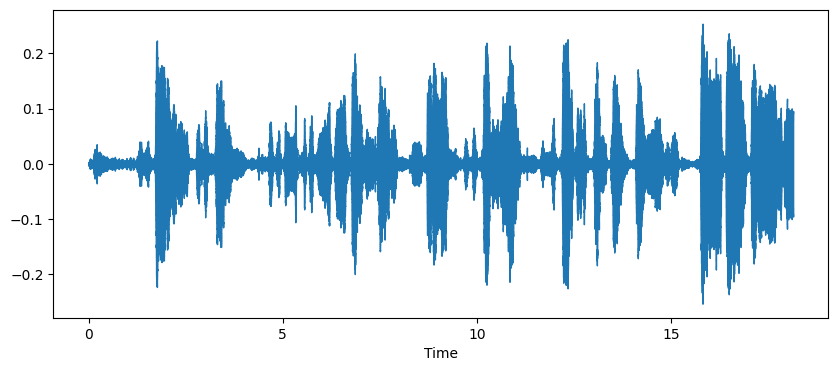

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=sr)

Melspectrogram:

(128, 782)


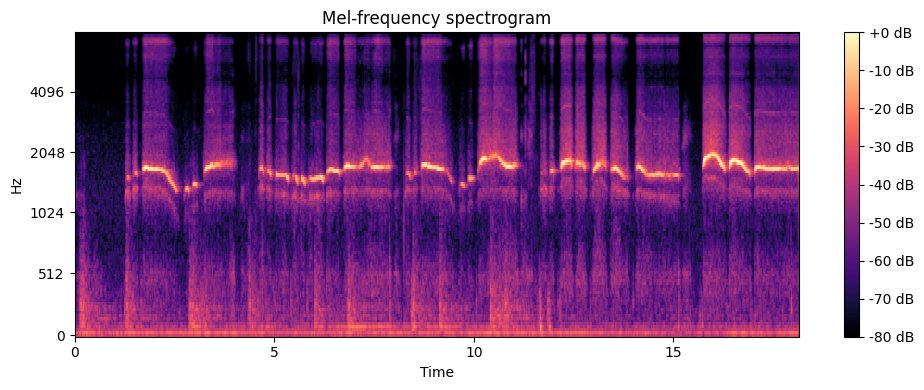

In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr)

import numpy as np

plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
print(S_dB.shape)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

Spectral Contrast:

(7, 782)


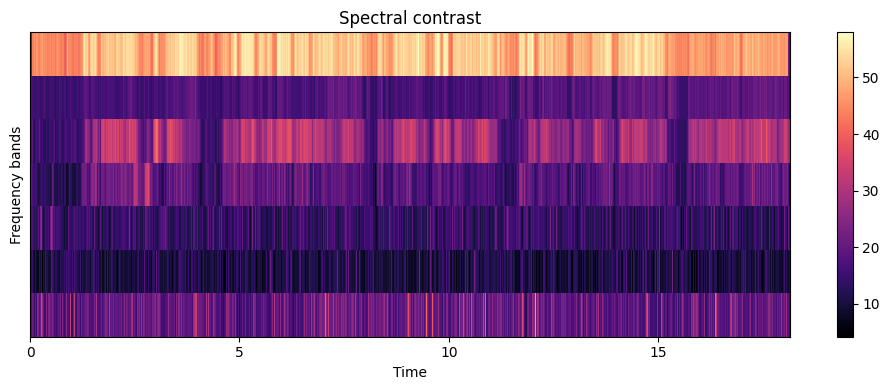

In [ ]:
S = np.abs(librosa.stft(x))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
print(contrast.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()


MFCC:

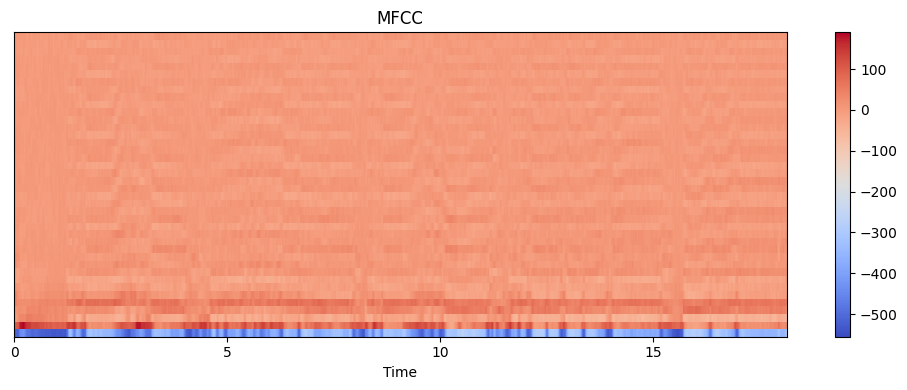

In [ ]:
mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [ ]:
allsongs_df_scaled[allsongs_df_scaled['interpret_lable']==True].describe() #for humming files
# 0-39: mfcc features
# 40-51: chroma
# 52-179: mel
# 180-186: contrast
# 187: power, 188: pitch mean, 189: pitch std, 190: voice frame


,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,song_lable
count,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,...,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000
mean,-0.013621,0.409270,0.255809,0.369838,0.209265,-0.153174,-0.283756,-0.169852,-0.071151,-0.094722,...,0.490038,-0.275318,-0.105458,0.255828,0.024200,0.005669,-0.493469,0.130551,0.274889,3.012470
std,1.022069,0.749175,0.916832,0.741035,0.942885,0.961472,0.896254,0.912111,1.013080,0.987638,...,0.679954,0.769384,0.868527,0.960050,0.964938,0.974001,0.678463,0.983040,0.735690,1.995878
min,-3.637857,-2.115919,-3.183694,-2.048097,-3.404760,-3.522122,-2.860886,-3.222476,-3.636568,-3.920645,...,-1.656464,-2.040425,-2.022728,-1.640809,-1.741611,-0.992703,-1.738558,-2.049219,-4.348177,0.000000
25%,-0.688552,-0.099279,-0.299507,-0.077205,-0.353197,-0.773497,-0.904827,-0.765668,-0.737001,-0.719024,...,0.033587,-0.810320,-0.765229,-0.415060,-0.705751,-0.441489,-1.052035,-0.641603,-0.185857,1.000000
50%,-0.051590,0.422562,0.308460,0.410991,0.274016,-0.073126,-0.265346,-0.159946,-0.067021,-0.105441,...,0.458923,-0.364676,-0.193667,0.131428,-0.074378,-0.168777,-0.642950,-0.011035,0.335706,3.000000
75%,0.606417,0.932031,0.860483,0.872293,0.866704,0.515988,0.372243,0.439974,0.633475,0.605547,...,0.913719,0.192875,0.441839,0.802891,0.577829,0.206675,0.023994,0.802604,0.820957,5.000000
max,4.279366,3.226258,2.585988,2.432197,2.987301,2.705018,2.596535,3.174889,2.791501,2.988026,...,3.015736,3.022812,3.554482,4.680006,3.726499,14.824448,1.622549,3.780889,2.046739,6.000000


In [ ]:
allsongs_df_scaled[allsongs_df_scaled['interpret_lable']==False].describe() #for whistling files
# 0-39: mfcc features
# 40-51: chroma
# 52-179: mel
# 180-186: contrast
# 187: power, 188: pitch mean, 189: pitch std, 190: voice frame


,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,song_lable
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,...,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,0.035589,-1.069333,-0.668372,-0.966307,-0.546763,0.400210,0.741391,0.443787,0.185901,0.247487,...,-1.280363,0.719347,0.275537,-0.668424,-0.063228,-0.014811,1.289328,-0.341102,-0.718224,2.973684
std,0.940251,0.752741,0.894923,0.942704,0.937433,0.989124,0.869440,1.081328,0.941177,0.990940,...,0.372548,1.163214,1.240869,0.767263,1.084951,1.066022,0.334955,0.964037,1.219798,2.005153
min,-2.763508,-3.463312,-5.099883,-3.145601,-3.443201,-3.500940,-2.650235,-3.141149,-2.556575,-2.300886,...,-1.767525,-1.987450,-1.869324,-1.744789,-1.682261,-0.959919,-2.663675,-2.328300,-5.419117,0.000000
25%,-0.599729,-1.643709,-1.195822,-1.586564,-1.177945,-0.204683,0.240971,-0.220996,-0.479939,-0.437366,...,-1.531173,0.025983,-0.677008,-1.110015,-0.886222,-0.591862,1.223668,-0.754580,-1.223267,1.000000
50%,0.019837,-1.106576,-0.679747,-1.081396,-0.571532,0.372301,0.792644,0.556986,0.184373,0.192043,...,-1.355854,0.920864,0.006074,-0.799008,-0.344399,-0.328307,1.327354,-0.465918,-0.542171,3.000000
75%,0.633827,-0.547069,-0.075817,-0.541765,0.006538,0.961916,1.332846,1.164167,0.832265,0.797267,...,-1.134593,1.523955,1.016707,-0.432459,0.542398,0.126905,1.422067,-0.115411,0.102770,5.000000
max,2.900780,1.071820,2.115805,3.797287,2.517627,4.284328,3.072588,3.607951,3.082607,5.251996,...,1.021612,3.414072,5.399171,5.732790,3.913771,7.963742,1.803155,6.881641,1.396778,6.000000


**8. Results**

Lets us test the model on the test files:

In [ ]:
print('Size of testing set:', X_test.shape, y_test.shape)

Size of testing set: (87, 190) (87,)


**Testing for SVM**

In [ ]:
print('Training Accuracy', np.mean(yt_p==y_train))
# Convert predicted probabilities to class labels
y_tpred = model.predict(X_test)
y_tpred_labels = np.argmax(y_tpred, axis=1)

# Now compare with y_test
print('Testing Accuracy', np.mean(y_tpred_labels == y_test))


Training Accuracy 0.5569871159563925
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Testing Accuracy 0.367816091954023


**Testing for CNN**

In [ ]:
score_test = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing Cross Entropy: %.2f" % score_test[0])

Testing Accuracy:  0.36781609058380127
Testing Cross Entropy: 4.43


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


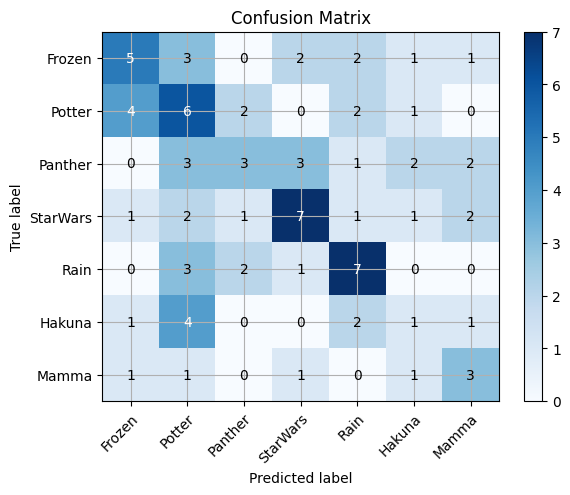

In [ ]:
y_pred_percentages = model.predict(X_test) # predicted percentages
y_pred = np.argmax(y_pred_percentages, axis=1) # Most prevalent prediction
cm = confusion_matrix(y_test, y_pred)

#ploting confusing matrix on testing set
plot_confusion_matrix(cm)

In [ ]:
print('Testing Accuracy', np.mean(y_pred==y_test))

Testing Accuracy 0.367816091954023


**9. Conclusion**
1. SVM Model:
     
     Training Accuracy 0.5688800792864221
     
     Testing Accuracy 0.4367816091954023

     Validation Accuracy:  0.4023136246786632

2.   CNN Model:
     
     Training Accuracy:  0.8855302333831787

     Testing Accuracy 0.4367816091954023

     Validation Accuracy:  0.3946015536785126

We can conclude that a CNN model performs better 2885 audio files as compared to a SVM Model.

The advance feature extraction has improved the accuracy of both the model, irrespective of the fact that we have not done any audio engineering that is any kind of noise reduction.

**Based on our CNN Model:**

**Songs which are performing good:** Frozen, Harry, Hakuna, Mamma

**Songs which are not performing good:** Panther, Starwars, Rain

The above results make sence as Starwars and Rain are difficult songs to hum or whistle.

---




    



**10. Appendix : Unsupervise learning**

Attempting Unsupervised learning for gender classification using Hierarchical Clustering on Humming Data:

Referenced Paper: Gender Identification using MFCC for Telephone Applications – A Comparative Study

Common approaches for gender recognition are based on the analysis of pitch of the speech. However, gender recognition using a single feature is not sufficiently accurate for a large variety of speakers. To capture differences in both time domain and frequency domain, a set of features known as Mel-frequency cepstrum coefficients (MFCC) are used. These are widely used state-of-the-art features for automatic speech and speaker recognition. MFCC features are extracted from speech signals over a small window of 20 to 40 milliseconds. These features are also known to work efficiently in noisy environments. Due to their robust nature, they are widely used in speaker recognition tasks


In [ ]:
data= allsongs_df_scaled[allsongs_df_scaled['interpret_lable']==True]


In [ ]:
mfcc= data.iloc[:,0:39]


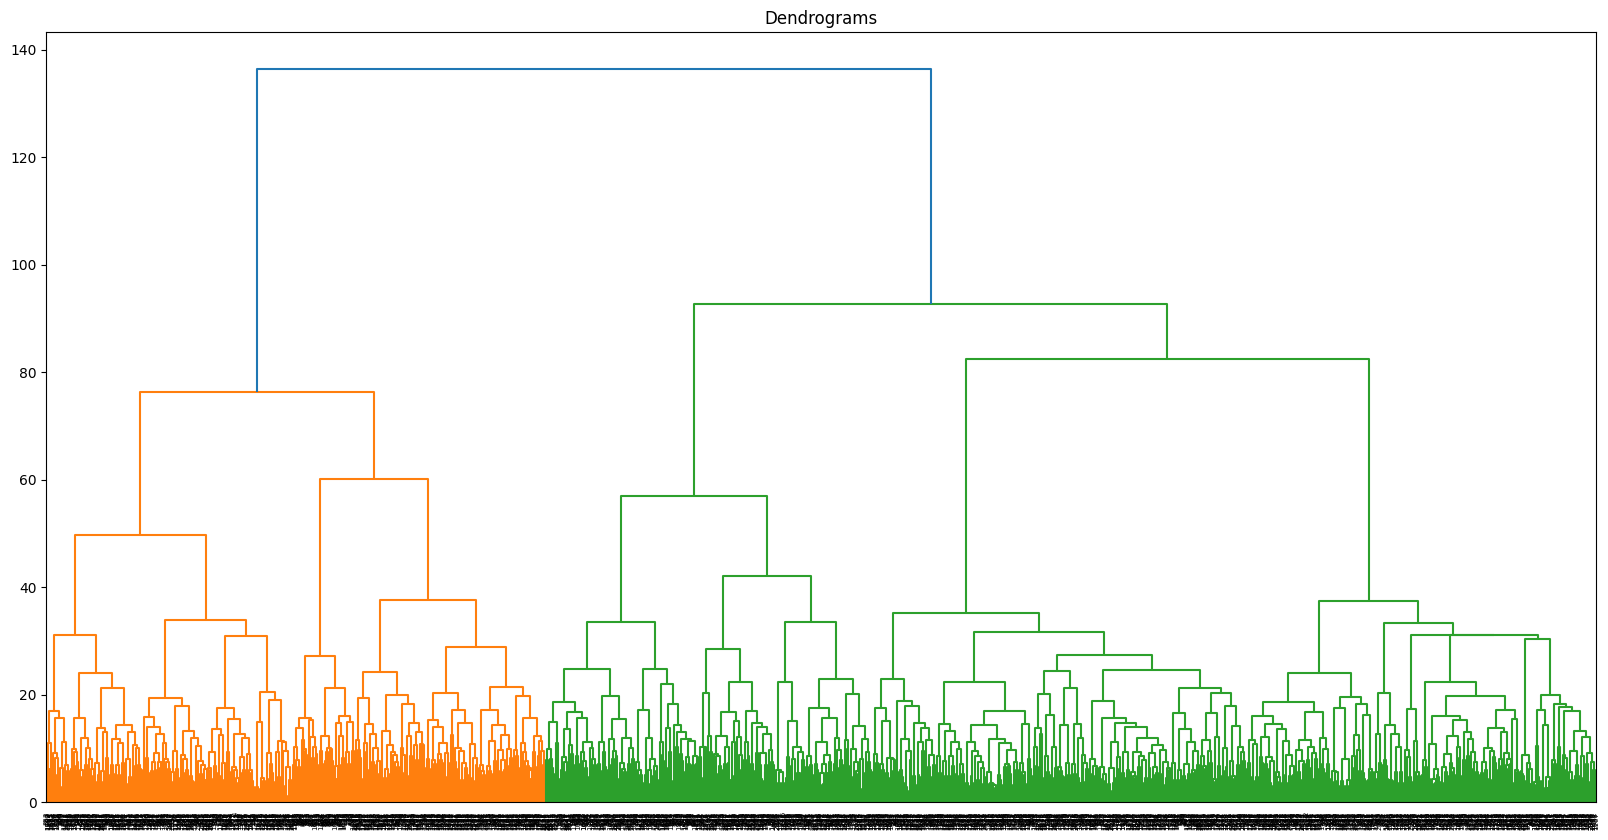

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(mfcc, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(mfcc)

array([0, 0, 0, ..., 0, 1, 0])

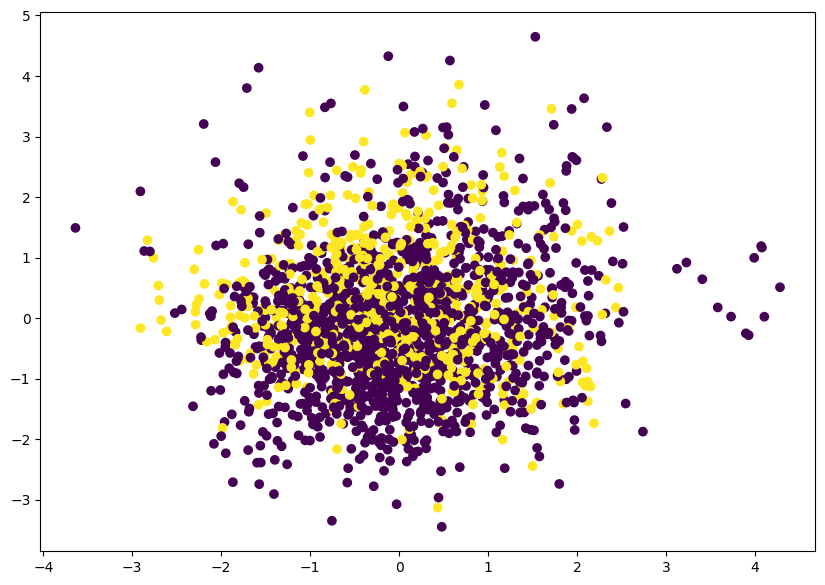

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['0'], data['39'], c=cluster.labels_)

In [ ]:
cnn_model = model  # Assign trained model to cnn_model
cnn_model.save("cnn_model.keras")  # Saves in the new format



In [ ]:
import joblib
svm_model = model
joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']

In [ ]:
model.save("/content/drive/My Drive/cnn_model.h5")



In [ ]:
model.save("/content/drive/My Drive/cnn_model.keras.h5")


In [ ]:
joblib.dump(svm_model, "/content/drive/My Drive/svm_model.pkl")

['/content/drive/My Drive/svm_model.pkl']

In [12]:
!pip install --upgrade pip
!pip install streamlit
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
changed 22 packages in 2s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [13]:
!wget -q -O - http://ipv4.icanhazip.com

34.57.168.56


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/My Drive/cnn_model.h5")
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          48,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,505 (353.54 KB)

 Trainable params: 90,503 (353.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [14]:
%%writefile app.py
import streamlit as st
import librosa
import numpy as np
import io
import tensorflow as tf

# Load trained model
model = tf.keras.models.load_model("/content/drive/My Drive/cnn_model.h5")

# Define class labels
CLASS_LABELS = ["Potter", "Star Wars", "Frozen", "Panther", "Rain", "Mamma", "Hakuna"]

# Function to extract MFCC features
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=128, n_fft=2048, hop_length=512)
    mfccs = np.mean(mfccs.T, axis=0)

    # Pad with zeros to reach 190 features
    if mfccs.shape[0] < 190:
        mfccs = np.pad(mfccs, (0, 190 - mfccs.shape[0]), mode='constant')

    return mfccs.reshape(1, -1)  # Now shape should be (1, 190)

# Streamlit UI
st.title("Hums-Whistle Song Recognition")
st.write("Upload a hum or whistle audio file to predict the song.")

# File uploader
uploaded_file = st.file_uploader("Upload an audio file", type=["wav", "mp3", "ogg"])

if uploaded_file is not None:
    st.audio(uploaded_file, format="audio/wav")

    # Extract features from the uploaded file
    features = extract_features(uploaded_file)

    # ✅ Debugging: Print extracted feature shape
    st.write(f"Extracted Feature Shape: {features.shape}")

    # Make prediction
    prediction = model.predict(features)
    predicted_label = CLASS_LABELS[np.argmax(prediction)]

    # Display result
    st.success(f"Predicted Song: **{predicted_label}**")



Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.57.168.56:8501

⠼⠴⠦⠧⠇your url is: https://beige-planets-wonder.loca.lt
2025-02-22 12:23:55.516447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740227035.570438   22896 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740227035.586263   22896 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-22 12:24:00.663758: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
1/1 ━━━━━━━━━━━━━━━━━━